<a href="https://colab.research.google.com/github/itismeganrms/rl-a3/blob/main/Comparison_of_LR_Reinforce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wandb --quiet
!pip install swig --quiet
!pip install gym[all] --quiet
!pip install pygame --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.8/266.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.0/297.0 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.2 MB/s eta 0:00

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
## fixing the pygame error

import os
os.environ['SDL_VIDEODRIVER']='dummy'
import pygame
pygame.display.set_mode((640,480))

pygame 2.1.0 (SDL 2.0.16, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


<Surface(640x480x32 SW)>

In [4]:
import gym
from gym.envs import box2d
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [5]:
class Policy_NN_001(nn.Module):
    def __init__(self, input_size, output_size, hidden_size = 128, gamma = 0.99, learning_rate = 0.001):
        super().__init__()
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size = hidden_size
        self.gamma = gamma
        self.learning_rate = learning_rate
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=-1)

        self.optimizer = optim.Adam(self.parameters(),lr=self.learning_rate)


    def forward(self,x):
      x = self.layer1(x) #forward propagation
      x = self.layer2(x)
      x = self.softmax(x)
      return x

    def act(self,state):
        action_probs = torch.softmax(self.policy_network(state), dim=-1)
        return action_probs

In [6]:
class Policy_NN_01(nn.Module):
    def __init__(self, input_size, output_size, hidden_size = 128, gamma = 0.99, learning_rate = 0.01):
        super().__init__()
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size = hidden_size
        self.gamma = gamma
        self.learning_rate = learning_rate
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=-1)

        self.optimizer = optim.Adam(self.parameters(),lr=self.learning_rate)


    def forward(self,x):
      x = self.layer1(x) #forward propagation
      x = self.layer2(x)
      x = self.softmax(x)
      return x

    def act(self,state):
        action_probs = torch.softmax(self.policy_network(state), dim=-1)
        return action_probs

In [7]:
class Policy_NN_1(nn.Module):
    def __init__(self, input_size, output_size, hidden_size = 128, gamma = 0.99, learning_rate = 0.1):
        super().__init__()
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size = hidden_size
        self.gamma = gamma
        self.learning_rate = learning_rate
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=-1)

        self.optimizer = optim.Adam(self.parameters(),lr=self.learning_rate)


    def forward(self,x):
      x = self.layer1(x) #forward propagation
      x = self.layer2(x)
      x = self.softmax(x)
      return x

    def act(self,state):
        action_probs = torch.softmax(self.policy_network(state), dim=-1)
        return action_probs

In [8]:
class update_function:
    def __init__(self, Policy_NN, rewards, log_probs_array):
        self.network = Policy_NN
        self.rewards = rewards
        self.log_value = log_probs_array

    def update_function(self):
        discount_rewards = []
        Gt,pw = 0, 0
        for r in reversed(self.rewards):
            Gt = Gt + gamma**pw * r
            pw = pw + 1
            discount_rewards.append(Gt)

        steps_value = np.arange(len(self.rewards))

        discount_rewards = torch.tensor(discount_rewards)
        discount_rewards = discount_rewards[::-1].cumsum()[::-1] / gamma**steps_value

        policy_gradient = []
        for log_prob, e_d_r in zip(self.log_value, discount_rewards):
            policy_gradient.append(-log_prob*e_d_r)

        policy_network.optimizer.zero_grad()
        policy_gradient = torch.stack(policy_gradient).sum()
        policy_gradient.backward()
        policy_network.optimizer.step()

        return policy_gradient

In [9]:
import torch
import numpy as np
import gym
import statistics

In [10]:
def run(policy_network, env, n_episode):
    episodic_reward = []
    for episode in range(n_episode):
        state = env.reset()
        done = False
        log_probs_array = []
        total_reward = 0
        while not done:
            stateT = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
            action_probs = policy_network(stateT)
            action_dist = torch.distributions.Categorical(action_probs)
            action = action_dist.sample()
            log_prob = action_dist.log_prob(action.unsqueeze(0))
            log_probs_array.append(log_prob)
            next_state, reward, done, _ = env.step(action.item())
            total_reward += reward
            update_function(policy_network, reward ,log_probs_array)
            state = next_state

        print("Episode:{} | Reward: {}".format(episode, total_reward))
        episodic_reward.append(total_reward)
        env.close()
    return episodic_reward

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Episode:0 | Reward: -143.51834588907212
Episode:1 | Reward: -82.17723646625808
Episode:2 | Reward: -331.3454302536275
Episode:3 | Reward: -519.569719689875
Episode:4 | Reward: -117.64069286136787
Episode:5 | Reward: -303.4106473477053
Episode:6 | Reward: -445.1543669829924
Episode:7 | Reward: -98.99446447288337
Episode:8 | Reward: -125.18002701872535
Episode:9 | Reward: -240.5885767019658
Episode:10 | Reward: -398.58149142050945
Episode:11 | Reward: -236.9015811433198
Episode:12 | Reward: -201.04839863311705
Episode:13 | Reward: -125.4934364102842
Episode:14 | Reward: -141.1869188355906
Episode:15 | Reward: -100.08972658337817
Episode:16 | Reward: -126.12028050250242
Episode:17 | Reward: -463.15278026929826
Episode:18 | Reward: -160.85607910254265
Episode:19 | Reward: -255.42005528589345
Episode:20 | Reward: -318.9789166816049
Episode:21 | Reward: -425.7572564402744
Episode:22 | Reward: -433.46716941904685
Episode:23 | Reward: -94.39072938474318
Episode:24 | Reward: -109.45496654121843

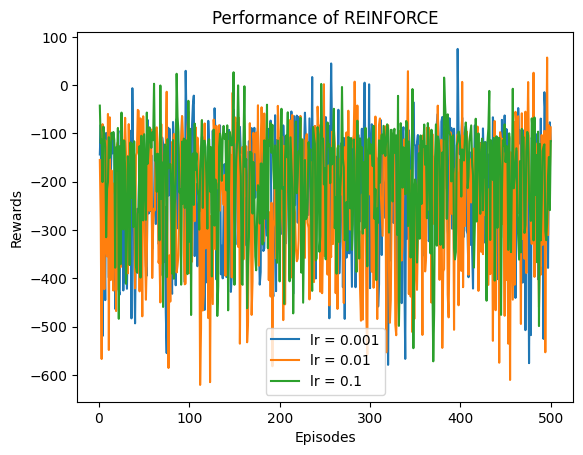

In [12]:
def main():
    env = gym.make("LunarLander-v2")
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n
    policy_network_001 = Policy_NN_001(state_size, action_size)
    policy_network_01 = Policy_NN_01(state_size, action_size)
    policy_network_1 = Policy_NN_1(state_size, action_size)

    n_episode = 500
    n_timesteps = 1000
    episode_array = [i for i in range(1,n_episode+1)]
    rewards_array_001 = run(policy_network_001,env,n_episode)
    rewards_array_01 = run(policy_network_01,env,n_episode)
    rewards_array_1 = run(policy_network_1,env,n_episode)

    plt.title("Performance of REINFORCE")
    plt.plot(episode_array, rewards_array_001, label = "lr = 0.001")
    plt.plot(episode_array,rewards_array_01, label = "lr = 0.01")
    plt.plot(episode_array,rewards_array_1, label = "lr = 0.1")
    plt.xlabel("Episodes")
    plt.ylabel("Rewards")
    plt.legend()
    plt.show()

main()